In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
label_to_description = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                        4: 'Coat', 5: 'Sandal', 6: 'Shirt',
                       7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot',
                        }

In [55]:
path_to_datasets = '/home/lor/Datasets/FashionMNIST/FashionMNIST/processed/training.pt'
samples = torch.load(path_to_datasets)
features = samples[0]
targets = samples[1]
print(features.shape, targets.shape)
print(targets.max())
print(targets.min())

torch.Size([60000, 28, 28]) torch.Size([60000])
tensor(9)
tensor(0)


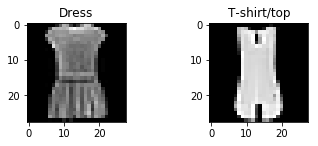

In [4]:
ax = plt.subplot(2, 2, 1)
plt.imshow(np.array(features[3]), cmap='gray')
ax.set_title(label_to_description[targets.storage()[3]])
ax = plt.subplot(2, 2, 2)
plt.imshow(np.array(features[4]), cmap='gray')
ax.set_title(label_to_description[targets.storage()[4]])
plt.show()
# plt.title(label_to_description[targets.storage()[3]])
# label_to_description[targets.storage()[3]]

In [5]:
from torch.utils.data import Dataset, DataLoader

In [44]:
class UserDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):
        target = self.targets[idx]
        feature = self.features[idx].unsqueeze(0).float()
        return (target, feature)

In [45]:
train_dataset = UserDataset(features, targets)
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=4)

In [46]:
one_iter = next(iter(train_dataloader))
one_iter[0].reshape(-1)

tensor([2, 6, 9, 7, 3, 3, 5, 2, 7, 4])

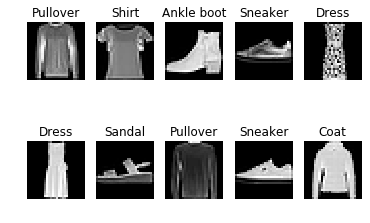

In [47]:
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(one_iter[1][i][0], cmap='gray')
    plt.axis('off')
    ax.set_title(label_to_description[one_iter[0].storage()[i]])

In [57]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Sequential(
                        nn.Conv2d(1, 16, kernel_size=(3, 3), stride=1, padding=1),
                        nn.BatchNorm2d(16),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        )
        
        self.conv2 = nn.Sequential(
                        nn.Conv2d(16, 24, kernel_size=(3, 3), stride=1, padding=1),
                        nn.BatchNorm2d(24),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        )
        
        self.fc1 = nn.Linear(7 * 7 * 24, 32)
        self.fc2 = nn.Linear(32, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.shape[0], -1)
        out = self.fc1(out)
        res = self.fc2(out)
        
        return res

In [58]:
net = Network()
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3)

total_step = len(train_dataloader)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (target, feature) in enumerate(train_dataloader):
        out = net(feature)
#         out = out.reshape(-1)
        target = target.reshape(-1)
        criterion = loss(out, target)
        
        optimizer.zero_grad()
        criterion.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, criterion.item()))
        